<a href="https://colab.research.google.com/github/hhongsii/All-the-3-Best-Movies/blob/master/1_Numpy%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_KNN_%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
dataset = np.array([
                    [3,104],
                    [2,100],
                    [1,81],
                    [101,10],
                    [99,5],
                    [98,2]
])

labels = (['Romance','Romance','Romance','Action','Action','Action'])

inX = np.array([25,87]) # 알고자하는 점

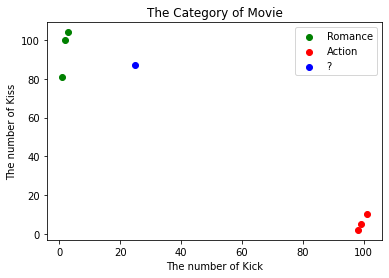

In [80]:
plt.title("The Category of Movie")
plt.scatter(dataset[:3,0],dataset[:3,1],label='Romance',
            c='g')
plt.scatter(dataset[3:,0],dataset[3:,1],label='Action',
            c='r')
plt.scatter(25,87,label="?",
            c='b')


plt.xlabel('The number of Kick')
plt.ylabel('The number of Kiss')
plt.legend()
plt.show()


KNN
- 자기의 값과 비슷한 K개 데이터를 뽑아오고 
다수결을 통해 새로운 데이터 분류 항목 결정

5. 해당 항목 반환

1. 우리가 분류항목을 알고자 하는 점(inX)와 알고 있는 점들(dataset)과의 모든 점 거리를 계산

In [81]:
# broadcasting을 이용하면 보다 간결하고 빠른 코드를 작성할 수 있습니다.
## ⚠️⚠️⚠️ 반복문, 순회문 사용하지 않고 numpy broadcasting 을 사용해 구현하세요. ⚠️⚠️⚠️

# 위 정의한 inX와 그 이외의 모든 점들과의 거리를 계산합니다. 
# 거리는 위 정의한 l2 distance 을 사용합니다. 
dists = (dataset - inX)*(dataset - inX)
# print(dists)
new_dists = dists[:,0] + dists[:,1]
# print(new_dists)

dists = np.sqrt(new_dists)
print(dists)


[ 27.80287755  26.41968963  24.73863375 108.1896483  110.45361017
 112.04463396]


2. 오름 차순으로 거리의 길이를 정렬

In [82]:
# 오름차순으로 정렬된 인덱스 순을 반환
# numpy 을 사용해 위 생성한 거리(dists) 에서 거리가 가장 짧은 데이터의 index을 정렬(sort) 합니다. 
sorted_index = dists.argsort()
sorted_index


array([2, 1, 0, 3, 4, 5])

3. inX와의 거리가 가장 짧은 아이템 추출

In [87]:
# 위 생성한 sorted index 을 사용해 거리가 가장 짧은 순서대로 labels 을 나열합니다. 
sorted_labels = np.array([])

for index in sorted_index: 
  sorted_labels = np.append(sorted_labels,labels[index])

print(sorted_labels)
# 위 생성한 sorted_labels 을 활용해 거리가 가장 가까운 k=4 개의 데이터를 가져옵니다. 
K_nearest_labels = sorted_labels[0:4]

['Romance' 'Romance' 'Romance' 'Action' 'Action' 'Action']


In [88]:
K_nearest_labels

array(['Romance', 'Romance', 'Romance', 'Action'], dtype='<U32')

4. K개의 아이템에서 가장 많은 분류 항목 찾기

In [95]:
# K 개의 아이템에서 각 항목이 몇번씩 등작했는지 count합니다. 
count_dict = {}
Rnum = 0
Anum = 0
for label in K_nearest_labels:
  if label == 'Romance':
    Rnum = Rnum+1
    count_dict[label] = Rnum
  elif label == 'Action':
    Anum = Anum+1
    count_dict[label] = Anum
count_dict

{'Action': 1, 'Romance': 3}

In [103]:
# 제일 많이 등장한 횟수를 찾아 반환합니다. 
# 해당 예제에서는 Romance 을 반환해야 합니다. 
# np.unique 함수를 사용해야 합니다. 
_labels, count_labels = np.unique(K_nearest_labels, return_counts = True)
# print(_labels)
# print(count_labels)

_labels[count_labels.argmax()]

'Romance'

## 전체 Numpy Code 작성하기

In [104]:
def classify_knn(inX, dataset, labels, K):
    # dataset의 각 점들과 x와의 거리 계산
    dists = (dataset - inX)*(dataset - inX)
    new_dists = dists[:,0] + dists[:,1]
    dists = np.sqrt(new_dists)

    #오름차순으로 정렬
    sorted_index = dists.argsort()

    # 위 생성한 sorted index 을 사용해 거리가 가장 짧은 순서대로 labels 나열 
    sorted_labels = np.array([])
    for index in sorted_index: 
      sorted_labels = np.append(sorted_labels,labels[index])
    
    # 거리가 가장 짧은 K 개의 아이템 추출
    K_nearest_labels = sorted_labels[0:K]

    # 가장 많은 분류 항목 찾기
    _labels, count_labels = np.unique(K_nearest_labels, return_counts = True)
    _labels[count_labels.argmax()]

    return _labels[count_labels.argmax()]

In [105]:
# 킥 횟수가 52번, 키스 횟수가 10번인 작품
classify_knn([52, 10], dataset, labels, 4)

'Action'

In [106]:
# 킥 횟수가 19번, 키스 횟수가 72번인 작품
classify_knn([19, 72], dataset, labels, 4)

'Romance'